In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import sys
sys.path.append(r'C:\Users\Rory\extra_repos\ruairitran\package')
from ephys_plots import heatmap_by_cluster

In [3]:
save_dir = r'E:\figures\drug_effects'

In [4]:
def loader(par, exp):
    increase = f'{exp}_increase.csv'
    increase = pd.read_csv(os.path.join(par, increase), index_col=0)
    
    decrease = f'{exp}_decrease.csv'
    decrease = pd.read_csv(os.path.join(par, decrease), index_col=0)
    
    non_responders = f'{exp}_two tailed.csv'
    non_responders = pd.read_csv(os.path.join(par, non_responders), index_col=0)
    
    return increase, decrease, non_responders

In [5]:
d = r'E:\db\drug_effects'
exp = 'sert'

gq_increase, gq_decrease, gq_non_responders = loader(d, f'{exp}_gq')
mcherry_increase, mcherry_decrease, mcherry_non_responders = loader(d, f'{exp}_mcherry')

In [6]:
c = r'E:\db\CLUSTERS_DONE.csv'

dfc =  pd.read_csv(c)
dfc = dfc[['hc_cluster', 'neuron_id', 'colors']]
dfc['neuron_id'] = dfc['neuron_id'].astype('str')

In [7]:
gq_increase.index = pd.to_timedelta(gq_increase.index)

In [35]:
'''Given a ts_df and a dict of {group: ids, group: ids}, 
   return a ts with mean values at each timepoint by group'''

def _mean_by_group(row, categories):
    out = {}
    for name, ids in categories.items():
        out[name] = np.mean(row[row.index.isin(ids)])
    return out

def mean_by_group(df, categories):
    return df.apply(_mean_by_group, axis=1, categories=categories).apply(pd.Series)


def normalise(df):
    n_rows = df.shape[0] // 2
    means = df1.iloc[:n_rows].apply(np.mean)
    return df.divide(means).multiply(100)

In [9]:
g = dfc.groupby('hc_cluster')['neuron_id']

categories = {name:ids for name, ids in g}

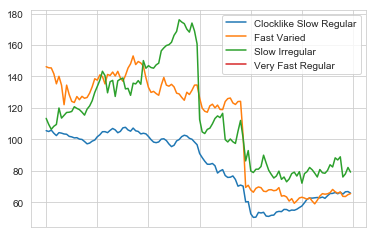

In [54]:
gqi =  mean_by_group(gq_decrease, categories)
gqi = normalise(gqi)
#gqi.index = pd.to_timedelta(np.arange(-60, 60, ), unit='s')
gqi.plot()

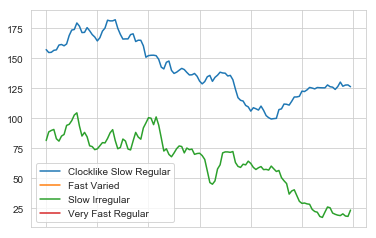

In [55]:
gqi =  mean_by_group(mcherry_decrease, categories)
gqi = normalise(gqi)
gqi.plot()

Text(0,0.5,'% Baseline')

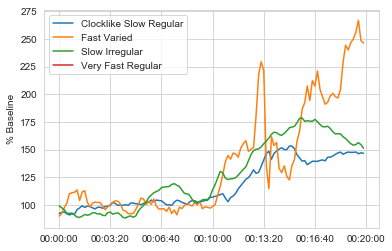

In [34]:
df1.divide(means).multiply(100).plot()
plt.ylabel('% Baseline')

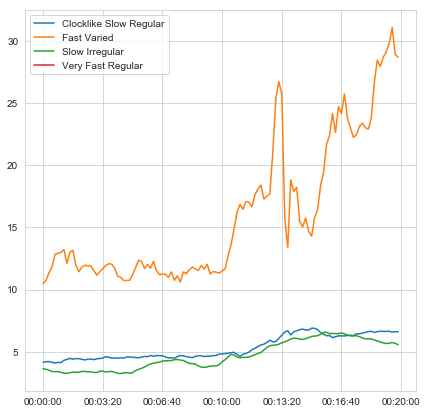

In [11]:
mean_by_group(gq_increase, categories).plot(figsize=(7,7))

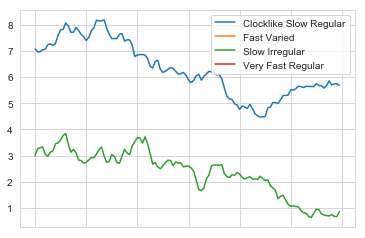

In [12]:
mean_by_group(mcherry_decrease, categories).plot()

In [13]:
df1 = mean_by_group(gq_decrease, categories)

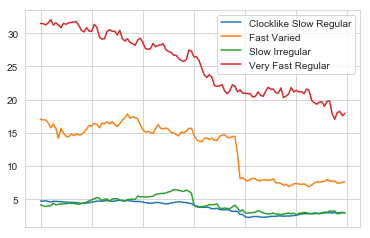

In [14]:
df1.plot()